<a href="https://colab.research.google.com/github/MuizzuddinRifqi/2141720027-PCVK-2023/blob/main/Pertemuan%2010%20-%20Tresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Al Akbar Baihaqi**

**Nim   : 2141720162**

**Kelas : TI-3E**

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
!pip install Pillow
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [217]:
import cv2 as cv
import numpy as np
# import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.


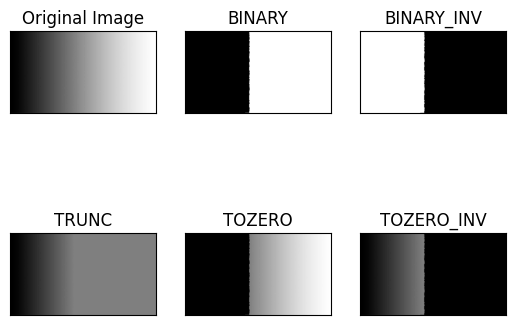

In [218]:
# Baca gambar dengan mode grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/assets/gradient.jpg', cv.IMREAD_GRAYSCALE)

# Pastikan gambar berhasil dibaca
assert img is not None, "file could not be read, check with os.path.exists()"

# Thresholding menggunakan beberapa metode yang berbeda
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

# Daftar judul untuk setiap gambar
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

# Daftar gambar yang akan ditampilkan
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Tampilkan gambar dalam bentuk subplot
for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Tampilkan plot
plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)


In [219]:
original = cv.imread('/content/drive/MyDrive/PCVK/assets/sc1.jpg',0)
ktp = cv.imread('/content/drive/MyDrive/PCVK/assets/sc1.jpg',0)

global tershold


In [220]:
# Salin gambar asli ke variabel 'globalImage'
globalImage = original.copy()

# Nilai ambang untuk thresholding
thresh = 90

# Metode thresholding global menggunakan cv.threshold
_, result = cv.threshold(globalImage, thresh, 255, cv.THRESH_BINARY)

# Atau, lakukan secara manual dengan mengubah nilai pixel berdasarkan ambang
globalImage[globalImage > thresh] = 255
globalImage[globalImage <= thresh] = 0


Otsu Thresholding

In [221]:
def _compute_otsu_criteria(im, th):
    # Buat gambar hasil thresholding
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # Hitung bobot (weights)
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # Jika salah satu kelas kosong, misalnya semua piksel di bawah atau di atas ambang, ambang tersebut tidak akan dipertimbangkan
    # dalam pencarian ambang terbaik
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # Temukan semua piksel yang termasuk ke masing-masing kelas
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # Hitung varians dari kedua kelas
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    # Hitung kriteria Otsu
    return weight0 * var0 + weight1 * var1


In [222]:
def otsuThresholding(img: np.ndarray) -> np.ndarray:
    # Membuat rentang ambang
    threshold_range = range(np.max(img) + 1)

    # Menghitung kriteria Otsu untuk setiap ambang dalam rentang
    criterias = np.array([_compute_otsu_criteria(img, th) for th in threshold_range])

    # Ambang terbaik adalah ambang yang meminimalkan kriteria Otsu
    best_threshold = threshold_range[np.argmin(criterias)]

    # Melakukan thresholding pada gambar menggunakan ambang terbaik
    binary = img
    binary[binary > best_threshold] = 255
    binary[binary <= best_threshold] = 0

    return binary


In [223]:
# Menggunakan fungsi otsuThresholding untuk melakukan thresholding Otsu pada gambar original
OtsuTresh = otsuThresholding(original)


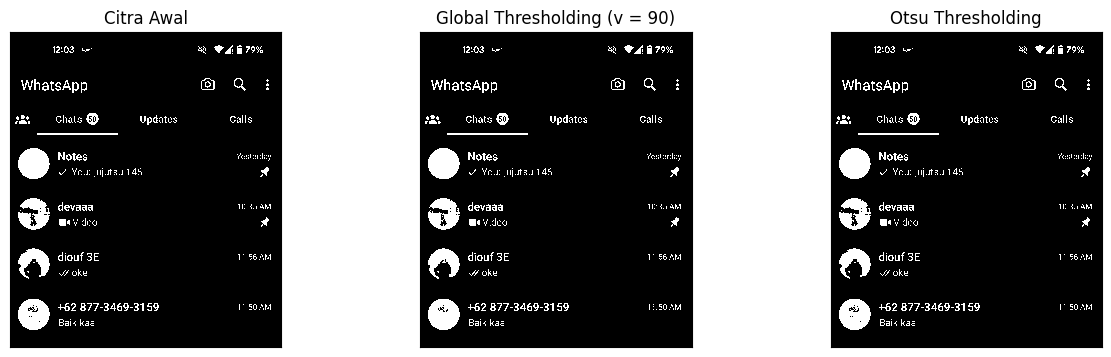

In [224]:
# Daftar judul dan gambar yang akan ditampilkan
titles = ['Citra Awal', 'Global Thresholding (v = 90)', 'Otsu Thresholding']
images = [original, globalImage, OtsuTresh]

# Membuat plot dengan ukuran tertentu
plt.figure(figsize=(15, 9))

# Looping untuk menampilkan gambar dalam subplot
for i in range(len(images)):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Menampilkan plot
plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder image

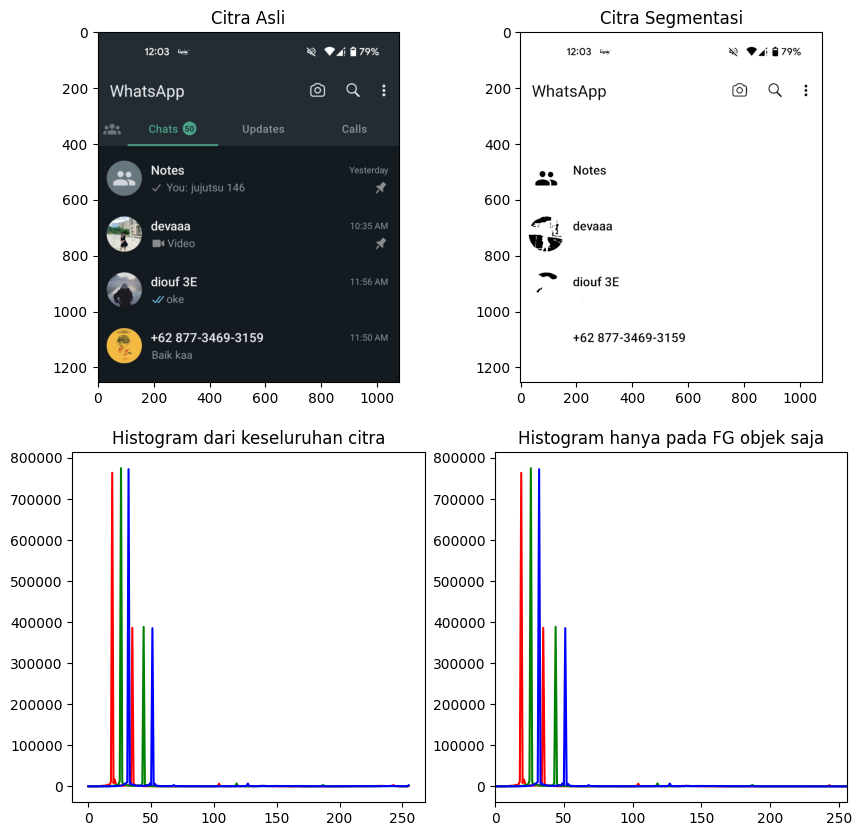

In [225]:
# Load the segmented image (foreground image)
pict_3 = ('/content/drive/MyDrive/PCVK/assets/sc1.jpg')
img_l = cv.imread(pict_3)
img_rgb = cv.cvtColor(img_l, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

# Thresholding untuk membuat citra segmentasi (mask)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

# Menampilkan citra asli dan citra segmentasi
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segmentasi')

# Menampilkan histogram dari keseluruhan citra
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist0 = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3), plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')

# Menampilkan histogram hanya pada FG objek saja
for i, col in enumerate(color):
    hist1 = cv.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4), plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0, 256])

plt.show()


6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

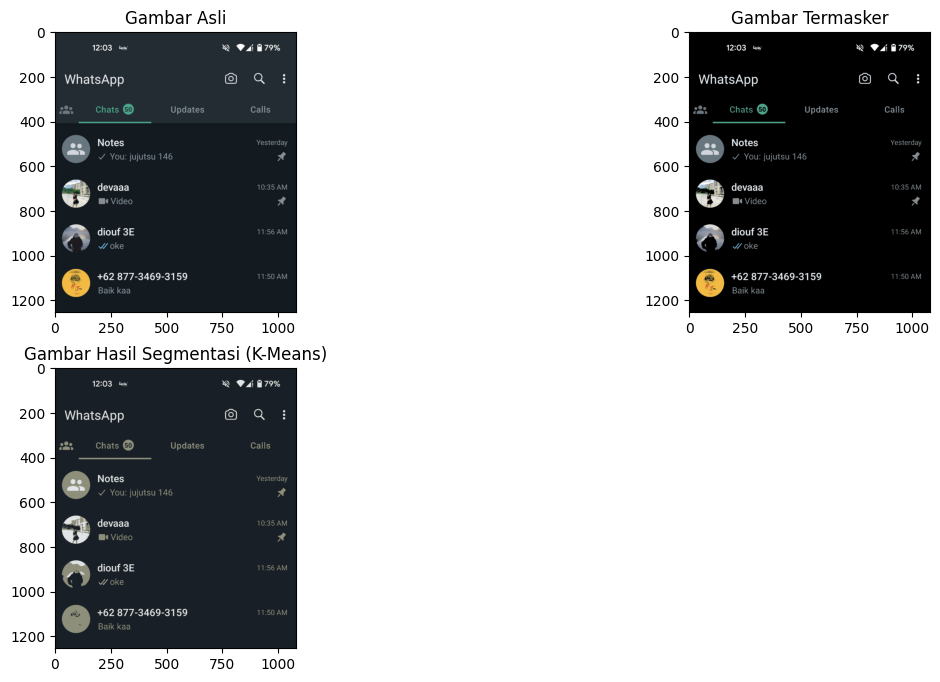

In [226]:
from sklearn.cluster import KMeans

# Muat gambar
filename = '/content/drive/MyDrive/PCVK/assets/sc1.jpg'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ratakan nilai piksel
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Tentukan kriteria dan jumlah cluster (k)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Jumlah cluster

# Terapkan K-Means clustering
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Konversi pusat cluster ke bilangan bulat
centers = np.uint8(centers)

# Ratakan array label
labels = labels.flatten()

# Buat gambar termasker dengan mengubah satu cluster menjadi hitam
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_black = 2
masked_image[labels == cluster_to_black] = [0, 0, 0]
masked_image = masked_image.reshape(img.shape)

# Konversi gambar hasil segmentasi kembali ke bentuk asli
segmented_image = centers[labels].reshape(img.shape)

# Tampilkan gambar asli, gambar termasker, dan gambar hasil segmentasi
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Gambar Asli')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Gambar Termasker')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Gambar Hasil Segmentasi (K-Means)')

plt.show()


## Tugas Praktikum

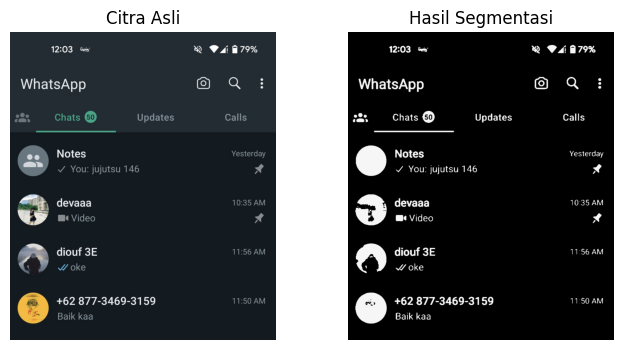

In [227]:
citraAwal = cv.imread('/content/drive/MyDrive/PCVK/assets/sc1.jpg')
citraAwal = cv.cvtColor(citraAwal, cv.COLOR_BGR2RGB)
imgKtp = cv.imread('/content/drive/MyDrive/PCVK/assets/sc1.jpg', cv.IMREAD_GRAYSCALE)

# Tresholding citra menggunakan Otsu Tresholding
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(imgKtp,(5,5),0)
ret3,th_img = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# melakukan segmentasi menggunakan K-means
# Flatten the pixel values
img_flatt = th_img.reshape((-1, 2))
img_flatt = np.float32(img_flatt)

# mendefinisikan kriteria dan menentukan jumlah klaster yang dipakai
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters

# Apply K-Means clustering
_, labels, centers = cv.kmeans(img_flatt, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(centers)
res = center[labels.flatten()]
segmented_img = res.reshape((th_img.shape))

# Menampilkan gambar asli dan hasil segmentasi K-Means
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(citraAwal)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Segmentasi')
plt.axis('off')

plt.show()

In [228]:
# Import library Matplotlib untuk membuat plot
import matplotlib.pyplot as plt

# Definisikan fungsi display dengan dua parameter: img (gambar) dan cmap (warna peta warna)
def display(img, cmap='gray'):
    # Buat objek gambar (figure) dengan ukuran 12x10 inci
    fig = plt.figure(figsize=(12, 10))

    # Tambahkan subplot pada gambar dengan 1 baris dan 1 kolom
    ax = fig.add_subplot(111)

    # Tampilkan gambar pada subplot dengan peta warna grayscale (default)
    ax.imshow(img, cmap='gray')

# Catatan: Kode ini hanya mendefinisikan fungsi display, namun tidak mengeksekusi tampilan


In [229]:
# Import library OpenCV untuk pengolahan gambar
import cv2 as cv

# Import modul Output dari pytesseract untuk mendapatkan data teks dari gambar
from pytesseract import Output

# Baca gambar KTP dari path tertentu
img = cv.imread('/content/drive/MyDrive/PCVK/assets/sc1.jpg')

# Gunakan pytesseract untuk melakukan OCR pada gambar dan mendapatkan data teks
text1 = pytesseract.image_to_data(img, output_type=Output.DICT)

# Cetak kunci (keys) dari dictionary hasil OCR
print(text1.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


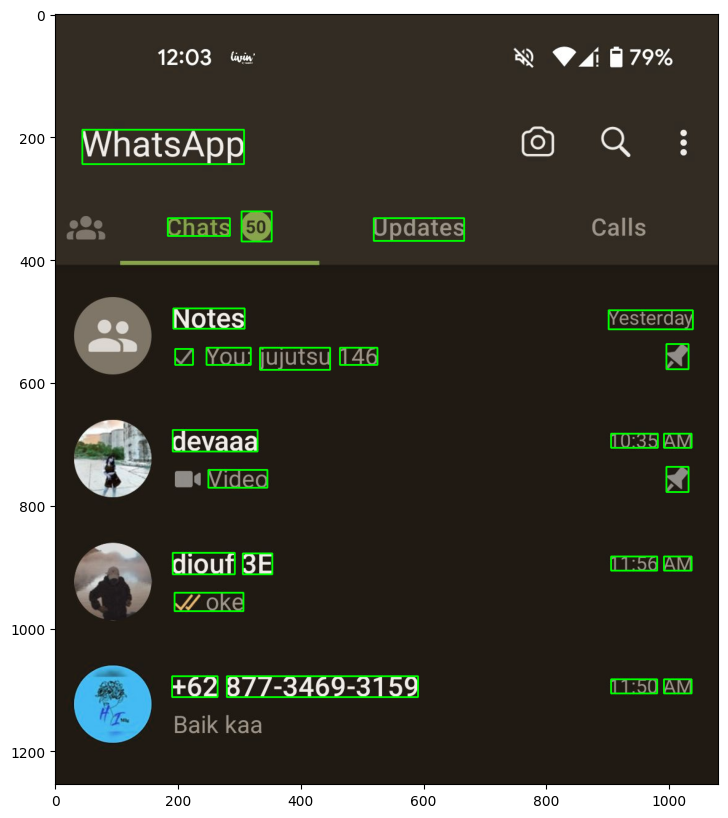

In [230]:
# Jumlah kotak (teks) yang terdeteksi pada gambar
n_boxes = len(text1['text'])

# Iterasi melalui setiap kotak (teks) yang terdeteksi
for i in range(n_boxes):
    # Cek tingkat kepercayaan (confidence) dari teks
    if int(text1['conf'][i]) > 60:
        # Dapatkan koordinat kotak (x, y, w, h)
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])

        # Gambar kotak persegi di sekitar teks dengan warna hijau (0, 255, 0) dan lebar garis 2
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Tampilkan gambar yang sudah diubah
display(img)


Text: WhatsApp, Confidence: 92
Text: Chats, Confidence: 92
Text: @, Confidence: 85
Text: Updates, Confidence: 96
Text: Notes, Confidence: 96
Text: Y, Confidence: 84
Text: You:, Confidence: 89
Text: jujutsu, Confidence: 89
Text: 146, Confidence: 95
Text: devaaa, Confidence: 91
Text: Video, Confidence: 96
Text: diouf, Confidence: 91
Text: 3E, Confidence: 92
Text: Woke, Confidence: 62
Text: +62, Confidence: 92
Text: 877-3469-3159, Confidence: 91
Text: Yesterday, Confidence: 96
Text: x, Confidence: 86
Text: 10:35, Confidence: 96
Text: AM, Confidence: 96
Text: x, Confidence: 81
Text: 11:56, Confidence: 96
Text: AM, Confidence: 96
Text: 11:50, Confidence: 96
Text: AM, Confidence: 96


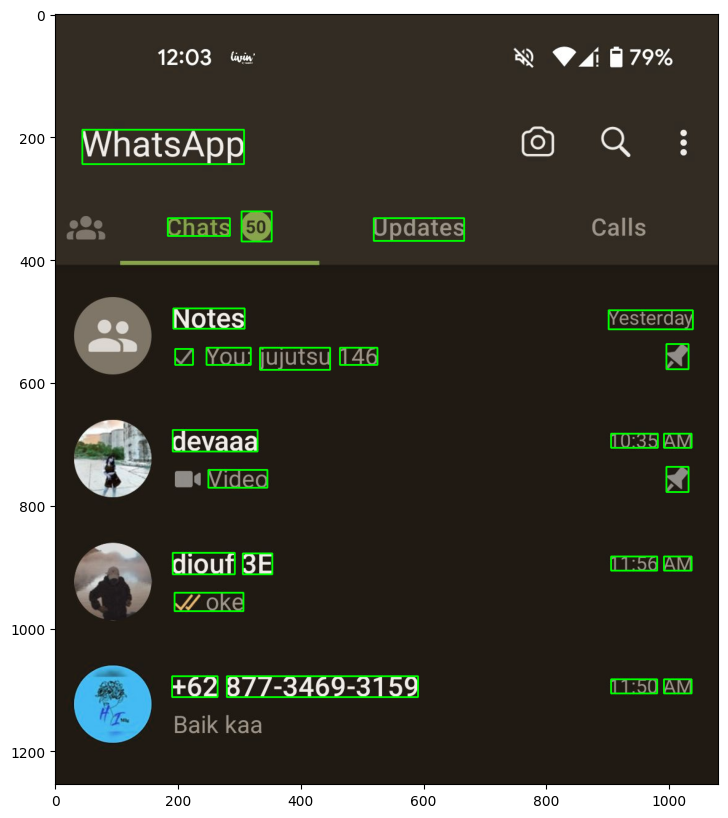

In [231]:
# Import the pytesseract module
from pytesseract import Output

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/assets/sc1.jpg')

# Perform OCR on the image to extract text data
text_data = pytesseract.image_to_data(img, output_type=Output.DICT)

# Loop through the detected text boxes
for i in range(len(text_data['text'])):
    # Check confidence level
    if int(text_data['conf'][i]) > 60:
        # Get text and coordinates
        text = text_data['text'][i]
        x, y, w, h = text_data['left'][i], text_data['top'][i], text_data['width'][i], text_data['height'][i]

        # Print the extracted text
        print(f"Text: {text}, Confidence: {text_data['conf'][i]}")

        # Draw a rectangle around the text region
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with rectangles around the text
display(img)
